In [2]:
import numpy as np
import pandas as pd

In [3]:
file_path = r"C:/Users/Vahe/Downloads/BNB_Historical_Data.csv"
df = pd.read_csv(file_path)
df.head(100)

,Date,Price,Open,High,Low,Vol.,Change %
0,06/01/2024,627.58,593.80,637.75,593.20,588.65K,5.69%
1,05/01/2024,593.80,578.41,629.98,537.50,10.58M,2.66%
2,04/01/2024,578.41,606.69,627.68,510.84,19.61M,-4.69%
3,03/01/2024,606.89,399.10,641.80,362.15,42.88M,52.06%
4,02/01/2024,399.10,300.50,426.79,296.61,22.09M,32.81%
...,...,...,...,...,...,...,...
74,04/01/2018,14.32,11.05,15.90,10.32,110.48M,29.64%
75,03/01/2018,11.04,10.46,14.93,7.07,109.34M,5.62%
76,02/01/2018,10.46,11.31,11.85,0.00,68.44M,-7.57%
77,01/01/2018,11.31,8.53,24.64,7.80,77.38M,32.63%


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [5]:
df['Date']

0    2024-06-01
1    2024-05-01
2    2024-04-01
3    2024-03-01
4    2024-02-01
        ...    
74   2018-04-01
75   2018-03-01
76   2018-02-01
77   2018-01-01
78   2017-12-01
Name: Date, Length: 79, dtype: datetime64[ns]

In [6]:
print(df.isnull().sum())


Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [7]:
df.dropna(inplace=True)


In [8]:
print(df.isnull().sum())


Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [9]:
df.sort_values(by='Date', inplace=True)


In [10]:
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [11]:
print(df.head())


         Date  Price   Open   High    Low     Vol. Change %
78 2017-12-01   8.53   1.95  11.30   1.88   32.83M  337.44%
77 2018-01-01  11.31   8.53  24.64   7.80   77.38M   32.63%
76 2018-02-01  10.46  11.31  11.85   0.00   68.44M   -7.57%
75 2018-03-01  11.04  10.46  14.93   7.07  109.34M    5.62%
74 2018-04-01  14.32  11.05  15.90  10.32  110.48M   29.64%


In [12]:
df['Change %'] = df['Change %'].str.replace('%', '').astype(float) / 100


In [13]:
df['Change %']

78    3.3744
77    0.3263
76   -0.0757
75    0.0562
74    0.2964
       ...  
4     0.3281
3     0.5206
2    -0.0469
1     0.0266
0     0.0569
Name: Change %, Length: 79, dtype: float64

In [14]:
df['Vol.'] = df['Vol.'].astype(str).str.replace('K', 'e3').str.replace('M', 'e6').str.replace('B', 'e9')

df['Vol.'] = pd.to_numeric(df['Vol.'], errors='coerce')

In [15]:
df['Vol.']

78     32830000.0
77     77380000.0
76     68440000.0
75    109340000.0
74    110480000.0
         ...     
4      22090000.0
3      42880000.0
2      19610000.0
1      10580000.0
0        588650.0
Name: Vol., Length: 79, dtype: float64

In [16]:
df.reset_index(drop=True, inplace=True)

df.head(20)

,Date,Price,Open,High,Low,Vol.,Change %
0,2017-12-01,8.53,1.95,11.30,1.88,32830000.0,3.3744
1,2018-01-01,11.31,8.53,24.64,7.80,77380000.0,0.3263
2,2018-02-01,10.46,11.31,11.85,0.00,68440000.0,-0.0757
3,2018-03-01,11.04,10.46,14.93,7.07,109340000.0,0.0562
4,2018-04-01,14.32,11.05,15.90,10.32,110480000.0,0.2964
5,2018-05-01,14.22,14.32,16.23,0.00,60180000.0,-0.0072
6,2018-06-01,14.74,14.20,17.44,13.36,77140000.0,0.0367
7,2018-07-01,13.80,14.67,14.88,11.64,46370000.0,-0.0635
8,2018-08-01,10.98,13.80,14.47,8.54,35910000.0,-0.2044
9,2018-09-01,10.02,10.99,11.57,9.01,25910000.0,-0.0872


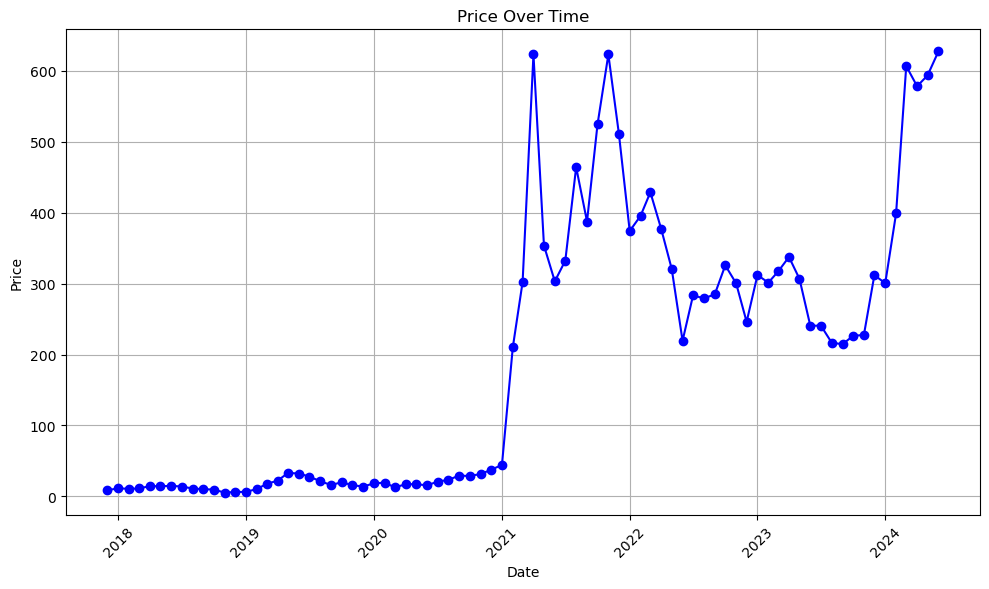

In [17]:
import matplotlib.pyplot as plt

df = pd.DataFrame(df)

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], marker='o', color='b', linestyle='-')
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [18]:
df['Year'] = df['Date'].dt.year
mean_price_by_year = df.groupby('Year')['Price'].mean()

print(mean_price_by_year)

Year
2017      8.530000
2018     10.967500
2019     19.595833
2020     22.500000
2021    390.040833
2022    319.636667
2023    271.106667
2024    517.713333
Name: Price, dtype: float64


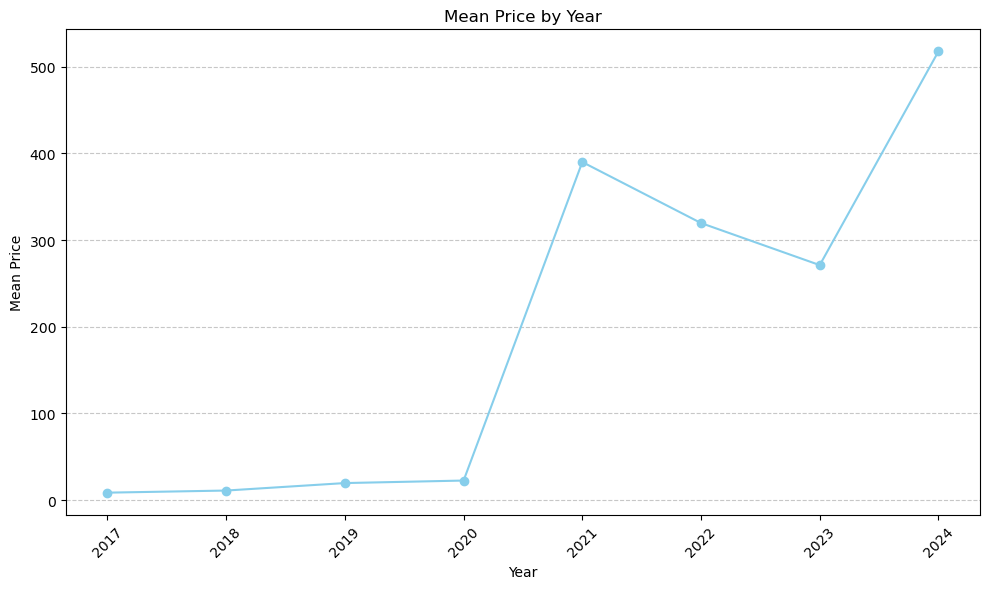

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_year.index, mean_price_by_year.values, marker='o', color='skyblue', linestyle='-')
plt.title('Mean Price by Year')
plt.xlabel('Year')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

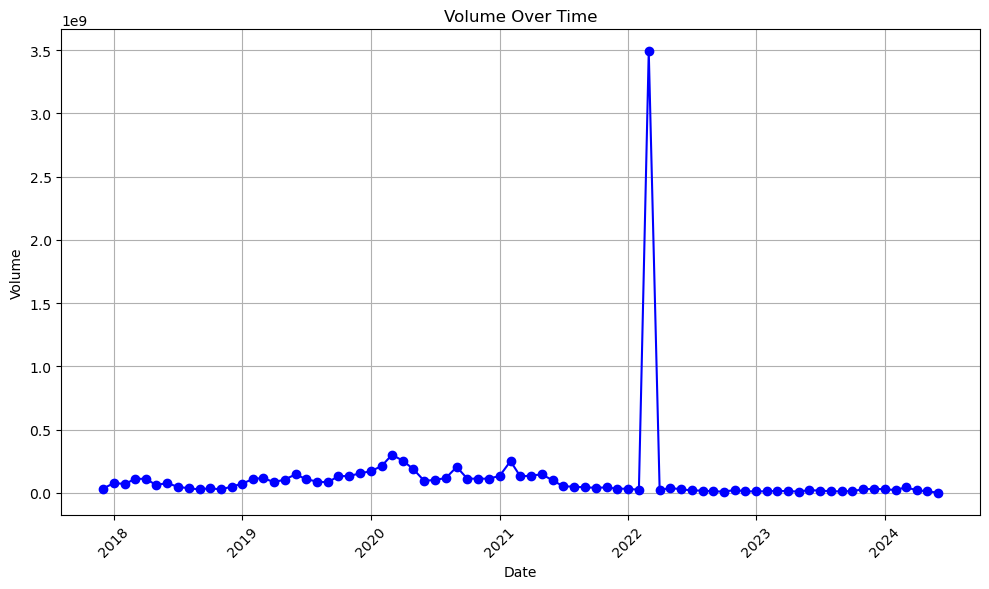

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Vol.'], marker='o', color='b', linestyle='-')
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()